## Data Cleaning & EDA

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import regex as re


from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
data = pd.read_csv('reddit_clean.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24494 entries, 0 to 24493
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subreddit    24494 non-null  object
 1   title        24494 non-null  object
 2   selftext     24494 non-null  object
 3   created_utc  24494 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 765.6+ KB


In [4]:
data.isnull().sum()

subreddit      0
title          0
selftext       0
created_utc    0
dtype: int64

In [5]:
data['subreddit'].value_counts(normalize=True)

stocks            0.515065
wallstreetbets    0.484935
Name: subreddit, dtype: float64

In [6]:
#  remoiving emojis and other unicode from text 
# adatped from https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python

def remove_emoji(data):
    '''
    Removes unicode text and replace with nothing
    '''
    
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emojis
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [7]:

def clean_text(text):
    '''
    Remove Emoji, html tags, URLS and punctuation -- returns text.
    '''
    text = remove_emoji(text)
    # remove HTML tags and URLs
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*','',text)
    
    # keep only text without punctuation
    text = re.sub(r'[^\w\s]','',text)
    
    return text

In [8]:
# Apply clean_text to title column
data['pro_title'] = data['title'].apply(lambda x: clean_text(x))

In [9]:
# Apply clean_text to text column
data['pro_selftext'] = data['selftext'].apply(lambda x: clean_text(x))

In [10]:
data.head()

,subreddit,title,selftext,created_utc,pro_title,pro_selftext
0,stocks,$TK &amp; $TNK,Thoughts on Teekay (TK) &amp; Teekay Tankers (...,1587476965,TK amp TNK,Thoughts on Teekay TK amp Teekay Tankers TNK T...
1,stocks,Investing Frameworks,Are there any frameworks/ concepts that you ha...,1587474494,Investing Frameworks,Are there any frameworks concepts that you hav...
2,stocks,Long term growth calculation,"Hi there, \n\n&amp;#x200B;\n\nI want to valuat...",1587474287,Long term growth calculation,Hi there \n\nampx200B\n\nI want to valuate a c...
3,stocks,Is this the perfect time for NEW companies to ...,This pandemic has demonstrated how badly thing...,1587473864,Is this the perfect time for NEW companies to ...,This pandemic has demonstrated how badly thing...
4,stocks,Is anyone else losing faith in the stock market?,"Maybe stocks will crash again, maybe stocks wi...",1587473142,Is anyone else losing faith in the stock market,Maybe stocks will crash again maybe stocks wil...


In [11]:
# Adapted from DC_Flex week 5
def create_lemmas(text):
    '''return lowercased, lemmatizeed list of words as a string from a document passed in '''
   
    lemmer = WordNetLemmatizer()
    return ' '.join([lemmer.lemmatize(word) for word in text.split()])

In [12]:
data['lem_title'] = data['pro_title'].apply(lambda x: create_lemmas(x))

In [13]:
data['lem_selftext'] = data['pro_selftext'].apply(lambda x: create_lemmas(x))

In [14]:
data.head()

,subreddit,title,selftext,created_utc,pro_title,pro_selftext,lem_title,lem_selftext
0,stocks,$TK &amp; $TNK,Thoughts on Teekay (TK) &amp; Teekay Tankers (...,1587476965,TK amp TNK,Thoughts on Teekay TK amp Teekay Tankers TNK T...,TK amp TNK,Thoughts on Teekay TK amp Teekay Tankers TNK T...
1,stocks,Investing Frameworks,Are there any frameworks/ concepts that you ha...,1587474494,Investing Frameworks,Are there any frameworks concepts that you hav...,Investing Frameworks,Are there any framework concept that you have ...
2,stocks,Long term growth calculation,"Hi there, \n\n&amp;#x200B;\n\nI want to valuat...",1587474287,Long term growth calculation,Hi there \n\nampx200B\n\nI want to valuate a c...,Long term growth calculation,Hi there ampx200B I want to valuate a company ...
3,stocks,Is this the perfect time for NEW companies to ...,This pandemic has demonstrated how badly thing...,1587473864,Is this the perfect time for NEW companies to ...,This pandemic has demonstrated how badly thing...,Is this the perfect time for NEW company to ta...,This pandemic ha demonstrated how badly thing ...
4,stocks,Is anyone else losing faith in the stock market?,"Maybe stocks will crash again, maybe stocks wi...",1587473142,Is anyone else losing faith in the stock market,Maybe stocks will crash again maybe stocks wil...,Is anyone else losing faith in the stock market,Maybe stock will crash again maybe stock will ...


In [15]:
lem_self_text = [w for w in data['lem_selftext'] if w not in stopwords.words('english')]

In [21]:
# Adapted From https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

def get_top_n_words(corpus, n=None):
    '''
    Vectorize a corpus, sum the frequency, and return a sorted list
    '''
    
    # instanciate and fit countvectorizer on corpus
    cvec = CountVectorizer(stop_words='english').fit(corpus)
    
    # Transform corpus
    bag_of_words = cvec.transform(corpus)
    
    # sum words in bag of words
    sum_words = bag_of_words.sum(axis=0) 
    
    # tally word sum based on word
    words_freq = [(word, sum_words[0, x]) for word, x in cvec.vocabulary_.items()]
    
    # Sort words_freq
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [17]:
# creating dataframe of lemmatized stocks postings 
stock_lem_title20 = data[data['subreddit'] == 'stocks']

In [18]:
# creating dataframe of lemmatized wallstbets postings 
bets_lem_title20 = data[data['subreddit'] == 'wallstreetbets']


In [22]:
# Listing top20 words in wallstbets
bets20 = get_top_n_words(bets_lem_title20['lem_title'], 20)
bets20 = pd.DataFrame(bets20, columns=['Word', 'Frequency'])
bets20.set_index('Word', inplace=True)

In [23]:
# Listing top20 words in stocks
stocks20 = get_top_n_words(stock_lem_title20['lem_title'], 20)
stocks20 = pd.DataFrame(stocks20, columns=['Word', 'Frequency'])
stocks20.set_index('Word', inplace=True)

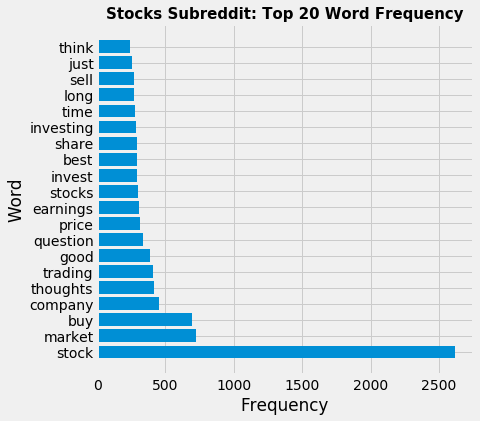

In [29]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 6))
plt.barh(y=stocks20.index, width=stocks20['Frequency'])
plt.title('Stocks Subreddit: Top 20 Word Frequency', fontsize=15, fontweight='bold')
plt.ylabel('Word')
plt.xlabel('Frequency')
plt.savefig('stocks.jpeg', bbox_inches = "tight");

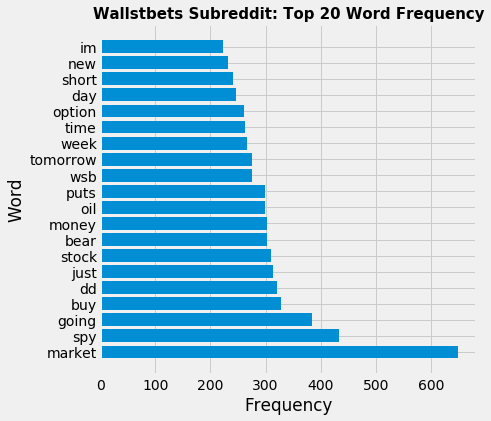

In [30]:
plt.figure(figsize=(6, 6))
plt.barh(y=bets20.index, width=bets20['Frequency'])
plt.title('Wallstbets Subreddit: Top 20 Word Frequency', fontsize=15, fontweight='bold')
plt.ylabel('Word')
plt.xlabel('Frequency')
plt.savefig('Wallst.jpeg', bbox_inches = "tight");

In [26]:
# dummify subreddit to 1 and 0
# data['subreddit'] = data['subreddit'].map({'stocks': 1, 'wallstreetbets': 0}) 

In [21]:
# data.to_csv('reddit_model.csv', index=False)